# Model Visualisation - Cars

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.style.use('fivethirtyeight')

In [ ]:
# Font Settings
plt.rcParams['font.family'] = 'monospace'
plt.rcParams['font.size'] = '24'

In [ ]:
# Figure Customization
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['figure.dpi'] = 150

In [ ]:
# Save Figure Customization
plt.rcParams['savefig.directory'] = "/images"
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['savefig.pad_inches'] = 0.5

In [ ]:
# Axes Customization
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.labelpad'] = 15
#plt.rcParams['axes.prop_cycle'] = cycler('color', ['#8dd3c7', '#feffb3', '#bfbbd9', '#fa8174', '#81b1d2', 
#                                                   '#fdb462', '#b3de69', '#bc82bd', '#ccebc4', '#ffed6f']),
plt.rcParams['axes3d.grid'] = False

In [ ]:
# Line Customization
plt.rcParams['lines.linewidth'] = 3

In [ ]:
# Tick Customization
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['xtick.major.pad'] = 20.0
plt.rcParams['ytick.major.pad'] = 20.0
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8

In [ ]:
def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in plt._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            #ax.spines['right'].set_color('none')
            #ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')

In [ ]:
# Marker Customization
plt.rcParams['markers.fillstyle'] = 'none'

In [ ]:
# plt.rcParams

In [4]:
# Specify Color
black = "#000000"
green = "#00FF1C"
yellow = "#FFFF00"
blue = "#0000FF"
red = "#FF0000"
orange = "#FFA500"

## Load the Data

In [5]:
cars = pd.read_csv("data/cars_small.csv")

In [6]:
cars = cars.sort_values(by = 'price')

In [7]:
cars.head(4)

,brand,model,price,kmpl,bhp,type
35,Tata,Nano,199,23.9,38,Hatchback
17,Suzuki,Alto 800,248,22.7,47,Hatchback
11,Hyundai,EON,302,21.1,55,Hatchback
26,Nissan,Datsun GO,312,20.6,67,Hatchback


In [8]:
cars.tail(4)

,brand,model,price,kmpl,bhp,type
19,Suzuki,Ciaz,725,20.7,91,Sedan
33,Skoda,Rapid,756,15.0,104,Sedan
14,Hyundai,Verna,774,17.4,106,Sedan
41,Volkswagen,Vento,785,16.1,104,Sedan


In [9]:
cars.loc[cars.type == 'Hatchback', 'type'] = 'hatchback'
cars.loc[cars.type == 'Sedan', 'type'] = 'sedan'

In [10]:
cars.loc[cars.type == 'hatchback', 'types'] = 0
cars.loc[cars.type == 'sedan', 'types'] = 1

In [11]:
cars.head()

,brand,model,price,kmpl,bhp,type,types
35,Tata,Nano,199,23.9,38,hatchback,0.0
17,Suzuki,Alto 800,248,22.7,47,hatchback,0.0
11,Hyundai,EON,302,21.1,55,hatchback,0.0
26,Nissan,Datsun GO,312,20.6,67,hatchback,0.0
16,Suzuki,Alto,315,24.1,67,hatchback,0.0


In [12]:
cars = cars.sort_values(by ='kmpl')

In [13]:
price = cars['price']
kmpl = cars['kmpl']
types = cars['types']
bhp = cars['bhp']

## [0] Visualise the Data

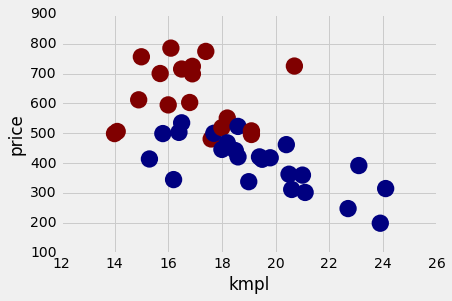

In [14]:
plt.scatter(kmpl, price, s = 300, c = types, linewidth=0)
plt.xlabel('kmpl')
plt.ylabel('price')
plt.savefig("figures/fig_cars_01.png")

## [1] Visualise the Prediction 

### Ordinary Least Square (OLS)

In [ ]:
from sklearn import linear_model

In [ ]:
# Run OLS
model_ols = linear_model.LinearRegression(normalize = True).fit(kmpl.reshape(-1,1),price)
price_ols = model_ols.predict(kmpl.reshape(-1,1))
beta_0_ols, beta_1_ols = model_ols.intercept_, model_ols.coef_[0]

In [ ]:
cars['price_ols'] = price_ols

In [ ]:
# Plot the data & model line
plt.scatter(kmpl, price, s = 250, facecolor="None", edgecolor=green, linewidth=2)
plt.scatter(kmpl, price_ols, s = 250, facecolor="None", edgecolor=orange, linewidth=4)

plt.xlabel('kmpl')
plt.ylabel('price')
hide_spines()
plt.savefig("figures/fig_cars_02.png")

## [2] Visualise the Model Parameters

### Ridge Regression

In [ ]:
from sklearn import linear_model

def ridge_sklearn(df, alpha):
    y = df.price
    X = df.kmpl.reshape(-1,1)
    X = np.c_[np.ones((X.shape[0],1)),X]
    model = linear_model.Ridge(alpha = alpha, normalize = True, fit_intercept = False)
    model.fit(X,y)
    price_ridge = model.predict(X)
    beta, price_ridge = np.array([model.coef_]).T, price_ridge
    return beta, price_ridge

In [ ]:
ridge_sklearn(cars, 0.1)

In [ ]:
ridge_model, price_ridge = ridge_sklearn(cars, 0.1)

In [ ]:
cars['price_ridge'] = price_ridge

In [ ]:
beta_0_ridge, beta_1_ridge = ridge_model[0,0], ridge_model[1,0]

In [ ]:
def ridge_plot(df, alphas, func):
    plt.scatter(df.kmpl, df.price, s = 250, facecolor="None", edgecolor=green, linewidth=2)
    plt.xlabel('kmpl')
    plt.ylabel('price')
    
    # Plot the Ridge line
    for a in alphas: 
        beta, price_ridge = func(df, a)
        x = np.arange(min(df.kmpl)-1, max(df.kmpl)+1, 1)
        y = beta[0,0] + beta[1,0] * x
        plt.plot(x, y, '-', c = orange)
        plt.text(x[-1] + 0.3, y[-1] - 10, r'$\alpha = $%s' % a)
    hide_spines()

In [ ]:
ridge_plot(cars, [0.0, 0.1, 0.5, 0.2, 1.0], ridge_sklearn)
plt.savefig("figures/fig_cars_03.png")

## [3] Visualise with different Input Parameters

### Bootstraping (Resampling)

In [ ]:
def bootstrap_ridge_single (z, alpha, func):
    plt.scatter(kmpl, price, s = 250, facecolor="None", edgecolor=green, linewidth=2)
    beta = []
    for i in range(z):
        
        # Select a sample and run Ridge
        sample_random = cars.sample(n=cars.shape[0], replace = True)
        b, p = func(sample_random, alpha)
        beta.append([b[0,0], b[1,0]])
        
        # Get the Ridge line
        x = np.arange(min(cars.kmpl)-1, max(cars.kmpl)+1, 1)
        y = b[0,0] + b[1,0] *x
        
        # Set the plotting area
        #plt.subplot(1, 2, 1)
        #plt.tight_layout()
        a = round(1/np.log(z), 2)
        
        # Plot the Ridge line
        plt.plot(x,y, '-', linewidth = 1, c = orange, alpha = a)
        plt.xlabel('kmpl')
        plt.ylabel('price')
        plt.ylim(100,900)

        # Plot the intercept and coefficients
        #plt.subplot(1,2,2)
        #plt.scatter(beta[i][1],beta[i][0], s = 200, alpha = a, facecolor=orange, edgecolor=orange, linewidth=2)
        #plt.xlim(-120,60)
        #plt.ylim(-500,3000)
        #plt.xlabel('beta_1')
        #plt.ylabel('beta_0')
    
    # Plot the Population line
    #plt.subplot(1, 2, 1)
    x = np.arange(min(cars.kmpl)-1,max(cars.kmpl)+1,1)
    y_p = beta_0_ols + beta_1_ols * x
    plt.plot(x, y_p, '-', linewidth ="4", c = 'white', alpha = 0.6)
    hide_spines()

In [ ]:
bootstrap_ridge_single (1000, [0.01], ridge_sklearn)
plt.savefig("figures/fig_cars_04.png")

In [ ]:
def bootstrap_ridge_dual (z, alpha, func):
    # plt.scatter(kmpl, price, s = 250, facecolor="None", edgecolor=green, linewidth=2)
    beta = []
    for i in range(z):
        
        # Select a sample and run Ridge
        sample_random = cars.sample(n=cars.shape[0], replace = True)
        b,p = func(sample_random, alpha)
        beta.append([b[0,0], b[1,0]])
        
        # Get the Ridge line
        x = np.arange(min(cars.kmpl)-1, max(cars.kmpl)+1, 1)
        y = b[0,0] + b[1,0] *x
        
        # Set the plotting area
        plt.subplot(1, 2, 1)
        plt.tight_layout()
        a = round(1/np.log(z), 2)
        
        # Plot the Ridge line
        plt.plot(x,y, '-', linewidth = 1, c = orange, alpha = a)
        plt.xlabel('kmpl')
        plt.ylabel('price')
        plt.ylim(100,900)

        # Plot the intercept and coefficients
        plt.subplot(1,2,2)
        plt.scatter(beta[i][1],beta[i][0], s = 100, alpha = a, facecolor=orange, edgecolor=orange, linewidth=2)
        plt.xlabel('beta_1')
        plt.ylabel('beta_0')
    
    # Plot the Population line
    plt.subplot(1, 2, 1)
    x = np.arange(min(cars.kmpl)-1,max(cars.kmpl)+1,1)
    y_p = beta_0_ols + beta_1_ols * x
    plt.plot(x, y_p, '-', linewidth ="4", c = 'white', alpha = 0.6)
    hide_spines()

In [ ]:
bootstrap_ridge_dual (1000, 0.01, ridge_sklearn)
plt.savefig("figures/fig_cars_05.png")

## [4] Visualise the Model Space

In [ ]:
import statsmodels.formula.api as sm
model_poly3 = sm.ols('price ~ np.power(kmpl, 3) + np.power(kmpl, 2) + kmpl', cars).fit()
price_poly3 = model_poly3.predict(kmpl)

In [ ]:
cars['price_poly3'] = price_poly3

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess
price_lowess = lowess(price, kmpl)[:,1]

In [ ]:
cars['price_lowess'] = price_lowess

In [ ]:
# Plot the data & model line
x = np.array(kmpl)
y = np.array(price)
y1 = np.array(cars.price_ols)
y2 = np.array(cars.price_ridge)
y3 = np.array(cars.price_lowess)
y4 = np.array(cars.price_poly3)

plt.scatter(x, y, s = 250, facecolor="None", edgecolor=green, linewidth=2)

plt.plot(x, y1, '-', linewidth ="2", c = orange)
plt.text(x[0] - 0.8, y1[0], 'OLS')

plt.plot(x, y2, '-', linewidth ="2", c = orange)
plt.text(x[0] - 1.2, y2[0] - 15, 'Ridge')

plt.plot(x, y3, '-', linewidth ="4", c = orange)
plt.text(x[-1] + 0.3, y3[-1] - 20, 'Lowess')

plt.plot(x, y4, '-', linewidth ="4", c = orange)
plt.text(x[-1] + 0.3, y4[-1], 'Poly(3)')

plt.xlabel('kmpl')
plt.ylabel('price')
hide_spines()
plt.savefig("figures/fig_cars_06.png")

In [ ]:
# Plot the data & model line
x = np.array(kmpl)
y = np.array(price)
y1 = np.array(cars.price_ols)
y2 = np.array(cars.price_ridge)
y3 = np.array(cars.price_lowess)
y4 = np.array(cars.price_poly3)

y5 = (y1 + y2 + y3 + y4)/4

plt.scatter(x, y, s = 250, facecolor="None", edgecolor=green, linewidth=2)

plt.plot(x, y1, '-', linewidth ="1", c = orange)

plt.plot(x, y2, '-', linewidth ="1", c = orange)

plt.plot(x, y3, '-', linewidth ="1", c = orange)

plt.plot(x, y4, '-', linewidth ="1", c = orange)

plt.plot(x, y5, '-', linewidth ="5", c = orange)
plt.text(x[-1] + 0.3, y4[-1], 'Ensemble')

plt.xlabel('kmpl')
plt.ylabel('price')
hide_spines()
plt.savefig("figures/fig_cars_06b.png")

## [4] Visualise the model & feature space

In [ ]:
ols_4X = np.asmatrix(cars.loc[:,('kmpl','types', 'bhp')])
ols_4y = np.asmatrix(cars.loc[:,'price']).T
model_ols_4 = linear_model.LinearRegression().fit(ols_4X,ols_4y)
price_ols_4 = model_ols_4.predict(ols_4X)
beta_0_ols_4, beta_1_ols_4 = model_ols_4.intercept_, model_ols_4.coef_
print(beta_0_ols_4, beta_1_ols_4)

In [ ]:
cars['price_ols_4'] = price_ols_4
cars['price_ols_4_error'] = cars['price_ols_4'] - cars['price']

In [ ]:
# Cross Validation
from sklearn.cross_validation import cross_val_predict
lr = linear_model.LinearRegression()
price_ols_4_val = cross_val_predict(lr, ols_4X, ols_4y, cv=6)
cars['price_ols_4_val'] = price_ols_4_val

In [ ]:
cars['price_ols_4_val'] = price_ols_4
cars['price_ols_4_val_error'] = cars['price_ols_4_val'] - cars['price']

In [ ]:
# Does not work as facecolor needs to be int
markcolor = [green, "None"]
facecolor = [markcolor[i] for i in list(types.astype(int))]

In [ ]:
cars0 = cars[cars.types == 0].copy(deep=True)
cars1 = cars[cars.types == 1].copy(deep=True)

In [ ]:
cars0

In [ ]:
cars1

In [ ]:
cars1.shape

In [ ]:
plt.scatter(cars0.kmpl, cars0.price, s = 250, facecolor="None", edgecolor=green, linewidth=4)
plt.scatter(cars1.kmpl, cars1.price, s = 250, facecolor=green, edgecolor=green, linewidth=4)
plt.xlabel('kmpl')
plt.ylabel('price')
hide_spines()
plt.savefig("figures/fig_cars_07.png")

In [ ]:
# Run OLS 3 features
def ols(kmpl_in,price_in):
    # print(df)
    model = linear_model.LinearRegression().fit(kmpl_in.reshape(-1,1),price_in)
    # print(df.shape)
    price_model = model_ols.predict(kmpl_in.reshape(-1,1))
    beta, price_model = np.array([model.intercept_, model.coef_[0]]).T, price_model
    #print(beta, price_model)
    return price_model

In [ ]:
kmpl0 = np.array(cars0.kmpl)
kmpl1 = np.array(cars1.kmpl)

In [ ]:
price0 = np.array(cars0.price)
price1 = np.array(cars1.price)

In [ ]:
price0.shape, kmpl0.shape, price_lowess_0.shape

In [ ]:
price1.shape, kmpl1.shape, price_lowess_1.shape

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess
price_lowess_0 = lowess(price0, kmpl0)[:,1]
price_lowess_1 = lowess(price1, kmpl1, frac=0.8)[:,1]

In [ ]:
price0.shape, kmpl0.shape, price_lowess_0.shape

In [ ]:
price1.shape, kmpl1.shape, price_lowess_1.shape

In [ ]:
price_lowess_0

In [ ]:
price_lowess_1

In [ ]:
kmpl1

In [ ]:
price1

In [ ]:
cars0.price_ols

In [ ]:
price_ols_type0 = ols(kmpl0,price0)
price_ols_type0

In [ ]:
price_ols_type1 = ols(kmpl0, price0)

In [ ]:
kmpl_type1.shape

In [ ]:
price_ols_type1.shape

In [ ]:
plt.scatter(kmpl0, price0, s = 250, facecolor="None", edgecolor=green, linewidth=4)
plt.scatter(kmpl1, price1, s = 250, facecolor=green, edgecolor=green, linewidth=4)

plt.scatter(kmpl0, price_lowess_0, s = 250, facecolor="None", edgecolor=orange, linewidth=4)
plt.scatter(kmpl1, price_lowess_1, s = 250, facecolor=orange, edgecolor=orange, linewidth=4)

plt.xlabel('kmpl')
plt.ylabel('price')

plt.xlim(12,26)
plt.ylim(100,900)

hide_spines()
plt.savefig("figures/fig_cars_08b.png")

## Simple OLS 3 Feature Model

In [ ]:
ols_3X = np.asmatrix(cars.loc[:,('kmpl','types')])
ols_3y = np.asmatrix(cars.loc[:,'price']).T
model_ols_3 = linear_model.LinearRegression().fit(ols_3X,ols_3y)
price_ols_3 = model_ols_3.predict(ols_3X)
beta_0_ols_3, beta_1_ols_3 = model_ols_3.intercept_, model_ols_3.coef_
print(beta_0_ols_3, beta_1_ols_3)

In [ ]:
# Plot the data & model line
plt.scatter(cars0.kmpl, cars0.price, s = 250, facecolor="None", edgecolor=green, linewidth=4)
plt.scatter(cars1.kmpl, cars1.price, s = 250, facecolor=green, edgecolor=green, linewidth=4)

#plt.scatter(kmpl, price, s = 250, facecolor="None", edgecolor=green, linewidth=2)
plt.scatter(kmpl, price_ols_3, s = 250, facecolor="None", edgecolor=orange, linewidth=4)

plt.xlabel('kmpl')
plt.ylabel('price')
hide_spines()
plt.savefig("figures/fig_cars_08a.png")

# [5] Process of Model Fitting

In [ ]:
plt.scatter(cars0.kmpl, cars0.price, s = cars0.bhp*4, facecolor="None", edgecolor=green, linewidth=2)
plt.scatter(cars1.kmpl, cars1.price, s = cars1.bhp*4, facecolor=green, edgecolor=green, linewidth=2)
plt.xlabel('kmpl')
plt.ylabel('price')
hide_spines()
plt.savefig("figures/fig_cars_09.png")

In [ ]:
# Plot the data & model line
plt.scatter(cars0.kmpl, cars0.price, s = cars0.bhp*4, facecolor="None", edgecolor=green, linewidth=2)
plt.scatter(cars1.kmpl, cars1.price, s = cars1.bhp*4, facecolor=green, edgecolor=green, linewidth=2)

plt.scatter(cars0.kmpl, cars0.price_ols_4, s = cars0.bhp*4, facecolor="None", edgecolor=orange, linewidth=2)
plt.scatter(cars1.kmpl, cars1.price_ols_4, s = cars1.bhp*4, facecolor=orange, edgecolor=orange, linewidth=2)

plt.xlabel('kmpl')
plt.ylabel('price')
hide_spines()
plt.savefig("figures/fig_cars_10.png")

## Visualise Model Errors
### OLS (4 feature)

In [ ]:
# Plot the errors
plt.scatter(cars0.kmpl, cars0.price, s = cars0.bhp*4, facecolor="None", edgecolor=green, linewidth=2)
plt.scatter(cars1.kmpl, cars1.price, s = cars1.bhp*4, facecolor=green, edgecolor=green, linewidth=2)

plt.scatter(cars0.kmpl, cars0.price_ols_4, s = cars0.bhp*4, facecolor="None", edgecolor=orange, linewidth=2)
plt.scatter(cars1.kmpl, cars1.price_ols_4, s = cars1.bhp*4, facecolor=orange, edgecolor=orange, linewidth=2)

plt.scatter(kmpl, price, s = 20, facecolor=red, edgecolor=red, linewidth=4)
plt.scatter(kmpl, price_ols_4, s = 20, facecolor=red, edgecolor=red, linewidth=4)

ols_errL = cars.price_ols_4 - cars.price
ols_errB = cars.price_ols_4 - cars.price_ols_4
plt.errorbar(kmpl, price_ols_4, fmt = 'none', yerr=[ols_errL, ols_errB], ecolor=red, elinewidth = 5)

plt.xlabel('kmpl')
plt.ylabel('price')
hide_spines()
plt.savefig("figures/fig_cars_11.png")

In [ ]:
# Plot the errors 
plt.scatter(kmpl, ols_errL, s = 20, facecolor="None", edgecolor=red, linewidth=4)
plt.scatter(kmpl, ols_errB, s = 20, facecolor="None", edgecolor=red, linewidth=4)

plt.axhline(0, color='w', linewidth=1)

plt.errorbar(kmpl, ols_errL, fmt = "none", yerr=[ols_errL, ols_errB], ecolor=red, elinewidth = 4)

plt.xlabel('kmpl')
plt.ylabel(r'price error $(\epsilon)$')
hide_spines()
plt.savefig("figures/fig_cars_12.png")

## Final Model - Cross Validation

In [ ]:
plt.scatter(price, price_ols_4_val, s = 200, facecolor="None", edgecolor='r', linewidth=2)

plt.xlabel('price')
plt.ylabel('price_prediction')

plt.xlim(100,900)
plt.ylim(100,900)

hide_spines()
plt.savefig("figures/fig_cars_13.png")

In [ ]:
plt.scatter(cars0.kmpl, cars0.price, s = cars0.bhp*4, facecolor="None", edgecolor=green, linewidth=2)
plt.scatter(cars1.kmpl, cars1.price, s = cars1.bhp*4, facecolor=green, edgecolor=green, linewidth=2)

plt.scatter(cars0.kmpl, cars0.price_ols_4_val, s = cars0.bhp*4, facecolor="None", edgecolor=orange, linewidth=2)
plt.scatter(cars1.kmpl, cars1.price_ols_4_val, s = cars1.bhp*4, facecolor=orange, edgecolor=orange, linewidth=2)

plt.xlabel('kmpl')
plt.ylabel('price')
hide_spines()
plt.savefig("figures/fig_cars_14.png")